#Important libraries

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.gridspec as gridspec
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


#The instructions to the walker

In [2]:
#the instructions

max_steps =100000        #maximum number of steps                                                          
counter=0
state=[1]  #initial state                                                                                               
time=[0]

#z=1
#m=1

#[z,m]=np.random.randint(1, 8, 2)

#random rates              
[k1,k2,k3,k4,k5,k6,k7,k8]=[10,0.1,4,0.51,10,0.1,4,0.51]#np.random.randint(1, 12, 8)# [z,m,z,m,z,m,z,m]#                                

print('\n k1 = ',k1,'\n k2 = ',k2,'\n k3 = ',k3,'\n k4 = ',k4,
      '\n k5 = ',k5,'\n k6 = ',k6,'\n k7 = ',k7,'\n k8 = ',k8)

def freedman_diaconis(data, returnas="width"):
    """
    Use Freedman Diaconis rule to compute optimal histogram bin width. 
    ``returnas`` can be one of "width" or "bins", indicating whether
    the bin width or number of bins should be returned respectively. 

    Parameters
    ----------
    data: np.ndarray
        One-dimensional array.

    returnas: {"width", "bins"}
        If "width", return the estimated width for each histogram bin. 
        If "bins", return the number of bins suggested by rule.
    """
    data = np.asarray(data, dtype=np.float_)
    IQR  = stats.iqr(data, rng=(25, 75), scale="raw", nan_policy="omit")
    N    = data.size
    bw   = (2 * IQR) / np.power(N, 1/3)

    if returnas=="width":
        result = bw
    else:
        datmin, datmax = data.min(), data.max()
        datrng = datmax - datmin
        result = int((datrng / bw) + 1)
    return(result)


 k1 =  10 
 k2 =  0.1 
 k3 =  4 
 k4 =  0.51 
 k5 =  10 
 k6 =  0.1 
 k7 =  4 
 k8 =  0.51


#The walking style 
'you may turn on the vision to see the walk'

In [3]:
#the walker

while counter < max_steps:
      if state[-1]==1:
         props_sum=k1+k7
         weights=[k1,k7]
         wait= np.random.exponential(1.0 / props_sum)
         new_state=random.choices([4,2], weights=weights)
         state=np.append(state,new_state)
         new_time=wait+time[-1]
         time=np.append(time,new_time)
         counter=counter+1
      elif state[-1]==2:
         props_sum=k2+k4
         weights=[k2,k4]
         wait= np.random.exponential(1.0 / props_sum)
         new_state=random.choices([1,3], weights=weights)
         state=np.append(state,new_state)
         new_time=wait+time[-1]
         time=np.append(time,new_time)
         counter=counter+1
      elif state[-1]==3:
         props_sum=k3+k6
         weights=[k3,k6]
         wait= np.random.exponential(1.0 / props_sum)
         new_state=random.choices([4,2], weights=weights)
         state=np.append(state,new_state)
         new_time=wait+time[-1]
         time=np.append(time,new_time)
         counter=counter+1
      elif state[-1]==4:
         props_sum= k8+k5
         weights=[k8,k5]
         wait= np.random.exponential(1.0 / props_sum)
         new_state=random.choices([1,3], weights=weights)
         state=np.append(state,new_state)
         new_time=wait+time[-1]
         time=np.append(time,new_time)
         counter=counter+1

#visualizing the walker
#plt.figure(figsize=(20,4))
#plt.step(time,state)

#Looking for the left and right transitions

In [5]:
#the searcher

R_transition = [1,2]                                                                #the transitions to the right
N = len(R_transition)
possibles = np.where(state == R_transition[0])[0]
R = []
for p in possibles:
    check = state[p:p+N]
    if np.all(check == R_transition):
        R.append(p)
#print('R--------------------',R)


L_transition = [2,1]                                                                  #the transitions to the left
N = len(L_transition)
possibles = np.where(state ==L_transition[0])[0]
L = []
for p in possibles:
    check = state[p:p+N]
    if np.all(check ==L_transition):
        L.append(p)
#print('L------------------',L,)

#Now looking for the respective combinations of transitions 

In [6]:
#the mixer

 # R-L and R-R                                                                                                             
RR=[]
RL=[max_steps,max_steps]
for i in R:
 k=[j for j in L if j>i]
 k=min(np.append(k,max_steps))

 if k==RL[-1]:
   RR=np.append(RR,[n,i])
   #print('x')
   RL[-2]=max_steps
   RL[-1]=max_steps
 n=i  
 RL=np.append(RL,[i,k])

 if RL[-1]==max_steps:
   RL[-2]=max_steps
s=[max_steps]

#print('RL',RL,'\n')
#print(list(set(RL) - set(s)))
RL=np.sort(list(set(RL) - set(s)))
#print('RL',RL,len(RL),'\n')
#print('RR',RR,len(RR),'\n')



# the L-R nad L-L
LL=[]                                                                                                      
LR=[max_steps,max_steps]
for i in L:
  k=[j for j in R if j>i]
  k=min(np.append(k,max_steps))
  if k==LR[-1]:
    #print('x')
    LL=np.append(LL,[n,i])
    LR[-2]=max_steps
    LR[-1]=max_steps
  n=i  
  LR=np.append(LR,[i,k])

if LR[-1]==max_steps:
   LR[-2]=max_steps
s=[max_steps]

#print('LR',LR,'\n')
#print(list(set(RL) - set(s)))
#print('R------------------',R,)
#print('L------------------',L,)
LR=np.sort(list(set(LR) - set(s)))
#print('LR',LR,len(LR),'\n')
#print('LL',LL,len(LL),'\n')

#Calculating the respective waiting times

In [7]:
 #the waiting time RL
#split up the RL array
split=[i for i in range(0,len(RL))]
#print(split)

OG=[]
 for i in split:
  if i%2 == 0:
    i=int(i)
    OG.append([RL[i],RL[i+1]])

 #the waiting time RL
wait_RL=[]                                                                            
 for i in OG:
  #print(i)
  T1=i[0]
  T2=i[1]
  wait_RL=np.append(wait_RL,time[int(T2)]-time[int(T1)])
#print(wait_RL)
#******************************************************************************

#split up the RR array
split=[i for i in range(0,len(RR))]
#print(split)

OG=[]
 for i in split:
  if i%2 == 0:
    i=int(i)
    OG.append([RR[i],RR[i+1]])

 #the waiting time RR
wait_RR=[]                                                                            
 for i in OG:
  #print(i)
  T1=i[0]
  T2=i[1]
  wait_RR=np.append(wait_RR,time[int(T2)]-time[int(T1)])
#print(wait_RR)
#******************************************************************************


#the waiting time LR
#split up the LR array
split=[i for i in range(0,len(LR))]
#print(split)

OG=[]
 for i in split:
  if i%2 == 0:
    i=int(i)
    OG.append([LR[i],LR[i+1]])

 #the waiting time LR
wait_LR=[]                                                                            
 for i in OG:
  #print(i)
  T1=i[0]
  T2=i[1]
  wait_LR=np.append(wait_LR,time[int(T2)]-time[int(T1)])
#print(wait_LR)
#******************************************************************************


#the waiting time LL
#split up the LL array
split=[i for i in range(0,len(LL))]
#print(split)

OG=[]
 for i in split:
  if i%2 == 0:
    i=int(i)
    OG.append([LL[i],LL[i+1]])

 #the waiting time LL
wait_LL=[]                                                                            
 for i in OG:
  #print(i)
  T1=i[0]
  T2=i[1]
  wait_LL=np.append(wait_LL,time[int(T2)]-time[int(T1)])
#print(wait_LL)

#Visualisation of the distributions

C:\Users\fkamu\anaconda3\lib\site-packages\scipy\stats\stats.py:2825: VisibleDeprecationWarning: use of scale='raw' is deprecated, use scale=1.0 instead
  warnings.warn(


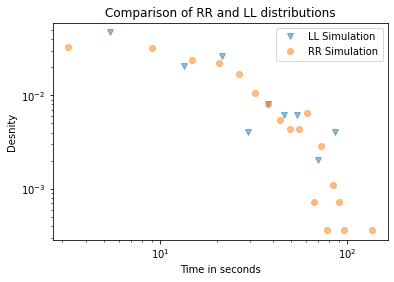

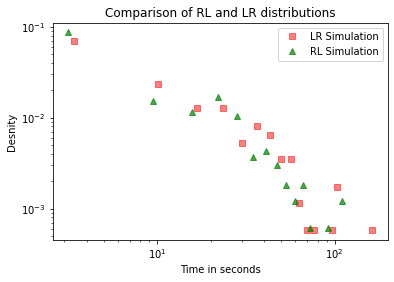

In [8]:
#visialization of the distributions

fig = plt.figure(1)
#gridspec.GridSpec(8,1)

#L-L distribution
'''
NBR_BINS= freedman_diaconis(wait_LL, returnas="bins")
plt.hist(wait_LL,NBR_BINS, density=True,linewidth=1.1,alpha=0.5,label='L-L transition')
'''
x = wait_LL
NBR_BINS= freedman_diaconis(x, returnas="bins")
counts,bin_edges = np.histogram(x,NBR_BINS,density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.random.rand(bin_centres.size)*0.5
plt.errorbar(bin_centres, counts,fmt='o',label='LL Simulation',marker='v',alpha=0.5)

#plt.yscale('log')

#******************************************************************************

#R-R distribution
'''
NBR_BINS= freedman_diaconis(wait_RR, returnas="bins")
plt.hist(wait_RR,NBR_BINS,density=True,alpha=0.5,linewidth=1.1,label='R-R transition')
'''
x = wait_RR
NBR_BINS= freedman_diaconis(x, returnas="bins")
counts,bin_edges = np.histogram(x,NBR_BINS,density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.random.rand(bin_centres.size)*0.5
plt.errorbar(bin_centres, counts,fmt='o',label='RR Simulation',marker='o',alpha=0.5)

plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title('Comparison of RR and LL distributions')
plt.xlabel('Time in seconds')
plt.ylabel('Desnity')

fig_name = 'distributions double.png'
fig.savefig(fig_name,dpi=300)









#******************************************************************************

fig = plt.figure(2)
#L-R distribution
'''
NBR_BINS= freedman_diaconis(wait_LR, returnas="bins")
plt.hist( wait_LR,NBR_BINS,density=True,alpha=0.5,linewidth=1.1,label='L-R transition')
'''
x = wait_LR
NBR_BINS=freedman_diaconis(x, returnas="bins")
counts,bin_edges = np.histogram(x,NBR_BINS,density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.random.rand(bin_centres.size)*0.5
plt.errorbar(bin_centres, counts,fmt='o',label='LR Simulation',marker='s',alpha=0.5,color='r')

plt.legend()
#******************************************************************************

#R-L distribution
'''
NBR_BINS= freedman_diaconis(wait_RL, returnas="bins")
plt.hist( wait_RL,NBR_BINS,density=True,alpha=0.5,linewidth=1.1,label='R-L transition')
'''
x = wait_RL
NBR_BINS= freedman_diaconis(x, returnas="bins")
counts,bin_edges = np.histogram(x,NBR_BINS,density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.random.rand(bin_centres.size)*0.5
plt.errorbar(bin_centres, counts,fmt='o',label='RL Simulation',marker='^',alpha=0.7,color='g')

plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title('Comparison of RL and LR distributions')
plt.xlabel('Time in seconds')
plt.ylabel('Desnity')
#******************************************************************************


fig_name = 'distributions switch .png'
fig.savefig(fig_name,dpi=300)

In [9]:
#!pip install control
import control
from sklearn import preprocessing

fig = plt.figure(3)
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

print('\n k1 = ',k1,'\n k2 = ',k2,'\n k3 = ',k3,'\n k4 = ',k4,
      '\n k5 = ',k5,'\n k6 = ',k6,'\n k7 = ',k7,'\n k8 = ',k8)
a=k1+k8
b=k3+k2
c=k4+k5
d=k6+k7
q=k3*k4
w=k7*k8
z=k5*k6

p3=control.TransferFunction([k1*k3*k5*k7],[1,a+b+c+d,(a*b+a*c+a*d+b*c+b*d+c*d-w-q+z),a*b*c+a*b*d+a*c*d-a*q+b*c*d-b*w-w*c-q*d+a*z+b*z,a*b*c*d-a*q*d-b*w*c+q*w+a*b*z])

print('\n p3 \n',p3,'\n',p3.pole()) 

tm,p3=control.impulse_response(p3)
p3 =NormalizeData(p3)
#wait_RR=NormalizeData(wait_RR)
#tm =NormalizeData(tm)
#p3=preprocessing.normalize(p3)
#plt.plot(tm,p3,label='Analytical RR distribution',linestyle='dashed',)

NBR_BINS= freedman_diaconis(wait_RR, returnas="bins")
'''
#wait_RR =NormalizeData(wait_RR)
plt.hist(wait_RR,NBR_BINS,density=True,alpha=0.5,linewidth=1.1,label='R-R transition')
#plt.yscale('log')
'''
x = wait_RR
NBR_BINS= freedman_diaconis(x, returnas="bins")
counts,bin_edges = np.histogram(x,NBR_BINS,density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.random.rand(bin_centres.size)*0.5
plt.errorbar(bin_centres, counts,fmt='o',label='RR distribution',marker='v',alpha=0.7)

x = wait_LL
NBR_BINS= freedman_diaconis(x, returnas="bins")
counts,bin_edges = np.histogram(x,NBR_BINS,density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.random.rand(bin_centres.size)*0.5
plt.errorbar(bin_centres, counts,fmt='o',label='LL distribution',marker='s',alpha=0.7)

x = wait_LR
NBR_BINS= freedman_diaconis(x, returnas="bins")
counts,bin_edges = np.histogram(x,NBR_BINS,density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.random.rand(bin_centres.size)*0.5
plt.errorbar(bin_centres, counts,fmt='o',label='LR distribution',marker='^',alpha=0.7)

x = wait_RL
NBR_BINS= freedman_diaconis(x, returnas="bins")
counts,bin_edges = np.histogram(x,NBR_BINS,density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.random.rand(bin_centres.size)*0.5
plt.errorbar(bin_centres, counts,fmt='o',label='RL distribution',marker='*',alpha=0.7)

'''
weights = np.ones_like(wait_RR)/float(len(wait_RR))
plt.hist(wait_RR, weights=weights,alpha=0.5,linewidth=1.1,label='R-R transition')
#generate bins boundaries and heights
bin_height,bin_boundary = np.histogram(wait_RR,bins=NBR_BINS,weights=weights)#,density=True)
#define width of each column
width = bin_boundary[1]-bin_boundary[0]
#standardize each column by dividing with the maximum height
bin_height = bin_height/float(max(bin_height))
#plot
plt.bar(bin_boundary[:-1],bin_height,width = width,alpha=0.5,linewidth=1.1,label='R-R transition',)
'''
plt.yscale('log')
#plt.xscale('log')
plt.ylim(0,1.5)
plt.legend()

fig_name = 'analytical comparison.png'
fig.savefig(fig_name,dpi=300)

ModuleNotFoundError: No module named 'control'